Import libraries

In [6]:
import numpy as np
import pandas as pd

Loading data

In [7]:
df_train = pd.read_csv('Airline-Sentiment-2-w-AA.csv', header=0, encoding = 'unicode_escape')
df_train.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [9]:
from io import StringIO

col = ['airline_sentiment', 'text']
df_train = df_train[col]
df_train = df_train[pd.notnull(df_train['text'])]
df_train.columns = ['airline_sentiment', 'text']

df_train['category_id'] = df_train['airline_sentiment'].factorize()[0]

category_id_df_train = df_train[['airline_sentiment', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df_train.values)

id_to_category = dict(category_id_df_train[['category_id', 'airline_sentiment']].values)

df_train.head()

,airline_sentiment,text,category_id
0,neutral,@VirginAmerica What @dhepburn said.,0
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0
3,negative,@VirginAmerica it's really aggressive to blast...,2
4,negative,@VirginAmerica and it's a really big bad thing...,2


Data Overview

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [12]:
print(df_train.shape)

df_train['category_id'].value_counts(normalize=True)

(14640, 3)


2    0.626913
0    0.211680
1    0.161407
Name: category_id, dtype: float64

In [15]:
positive_samples = df_train[df_train['category_id'] == 1]
negative_samples = df_train[df_train['category_id'] == 0]

In [16]:
for sample in positive_samples['text'].sample(3, random_state=42):
    print(sample)
    print('\n=======\n')

@SouthwestAir thanks for your excellent response time and assistance! All set :)


@JetBlue thanks. I appreciate your prompt response.


@JetBlue yes, with about 20 minutes to spare.  FYI - your employees are amazing.  Keep up the good work!




In [17]:
for sample in negative_samples['text'].sample(3, random_state=42):
    print(sample)
    print('\n=======\n')

@united we finally just arrive to Bogota, good but long flight!!


@AmericanAir got a callback at 1 am, took care of it. thanks.


@JetBlue is there wifi on he plain




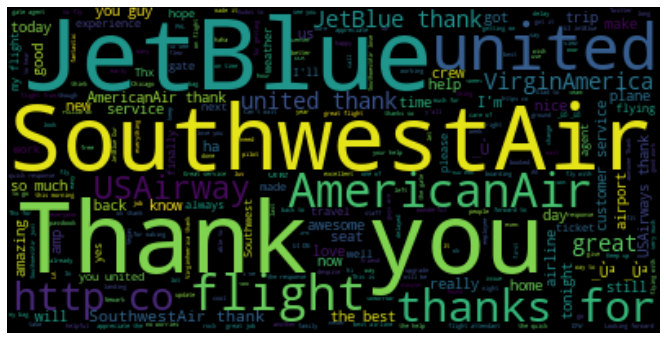

In [18]:
text = positive_samples['text'].values

wc = WordCloud(max_font_size=60, background_color="black", max_words=2000, stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17),interpolation="bilinear")
plt.show()

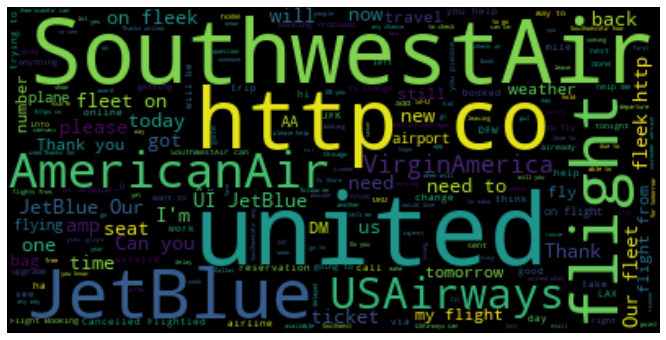

In [19]:
text = negative_samples['text'].values

wc = WordCloud(max_font_size=60, background_color="black", max_words=2000, stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17),interpolation="bilinear")
plt.show()

Baseline solutions

In [20]:
from sklearn.metrics import accuracy_score

In [22]:
constant_prediction = [0 for text in df_train['text']]

constant_accuracy_score = accuracy_score(df_train['category_id'], constant_prediction)
print(f'accuracy_score : {constant_accuracy_score}')

accuracy_score : 0.21168032786885246


Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

Split to train and test sets 

In [26]:

X, y = df_train['text'], df_train['category_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model

In [27]:
count_vectorizer = CountVectorizer(binary=True)
log_reg = LogisticRegression(solver='liblinear', random_state=42)

fit Model

In [28]:
count_vectorizer.fit(X_train)
X_train_vectorized = count_vectorizer.transform(X_train)

log_reg.fit(X_train_vectorized, y_train);

/home/chi/anaconda3/envs/nltkEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Prediction

In [29]:
X_test_vectorized = count_vectorizer.transform(X_test)

prediction_train = log_reg.predict(X_train_vectorized)
prediction_test = log_reg.predict(X_test_vectorized)

In [30]:
accuracy_score(y_train, prediction_train), accuracy_score(y_test, prediction_test),

(0.9335724043715847, 0.8101092896174863)

Scikit-Learn Pipeline 

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion

Model

In [32]:
count_vectorizer = CountVectorizer()
log_reg = LogisticRegression(solver='liblinear', random_state=42)

model = Pipeline([('count_vectorizer', count_vectorizer),  ('log_reg', log_reg)])

fit Model

In [33]:
model.fit(X_train, y_train);


/home/chi/anaconda3/envs/nltkEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Predict

In [34]:
accuracy_score(y_test, model.predict(X_test))

0.8043032786885246